In [50]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
import math
from classy import Class

In [51]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [52]:
var_name = 'log10_axion_ac'
var_min = -3.8
var_max = var_min + 0.5
var_num = 2
var_legend = 'log10_axion_ac'
var_figname = '2log10_axion_ac'

In [53]:
var2_name = 'log10_fraction_axion_ac'
var2_min = -1.5
var2_max = var2_min + 0.5
var2_num = 2
var2_legend = 'log10_fraction_axion_ac'
var2_figname = 'log10_fraction_axion_ac'

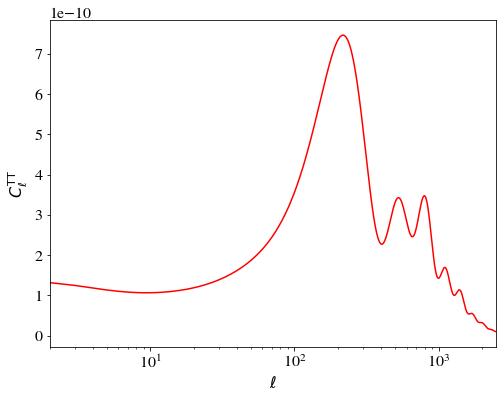

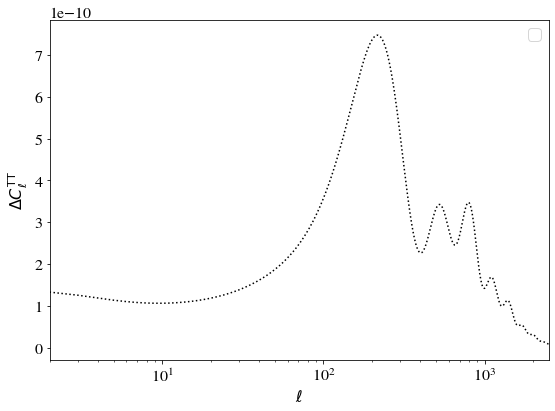

In [55]:
# Fixed settings with data from paper
#
common_settings = {"output":'tCl,lCl',
                   "lensing": 'yes',
                    #'log10_fraction_axion_ac':-1.0425,
                    #'log10_axion_ac':-3.462550e+00,
                    'omega_cdm':1.301552e-01,
                    'omega_b': 2.252816e-02,
                    # '100*theta_s':1.0415,
                    'h': 7.146560e-01,
                    'tau_reio':4.830625e-02,
                    'A_s':2.121646e-09,
                    'n_s':9.816718e-01,}

lcdm_M = Class()
lcdm_M.set(common_settings)
lcdm_M.compute()

cl_lcdm_M = lcdm_M.lensed_cl(2500)
ll_lcdm_M = cl_lcdm_M['ell'][2:]
clTT_lcdm_M = cl_lcdm_M['tt'][2:]
lcdm_y = clTT_lcdm_M*ll_lcdm_M*(ll_lcdm_M+1)/twopi

plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.plot(ll_lcdm_M,lcdm_y,'r-')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell^\mathrm{TT}$')

axi_settings = {"output":'tCl,lCl',
                'scf_potential' : 'axion',
                'n_axion' : 3,
                'scf_parameters' : '0.1,0',
                'scf_tuning_index':0,
                "lensing": 'yes',
                'log10_fraction_axion_ac':-1.0425,
                'log10_axion_ac':-3.462550e+00,
                'omega_cdm':1.301552e-01,
                'omega_b': 2.252816e-02,
                # '100*theta_s':1.0415,
                'h': 7.146560e-01,
                'tau_reio':4.830625e-02,
                'A_s':2.121646e-09,
                'n_s':9.816718e-01,}

# arrays for output
#
#kvec = np.logspace(-4,np.log10(3),1000)
legarray = []
twopi = 2.*math.pi
#
# Create figures
#
fig_TT, ax_TT = plt.subplots()

M = Class()
M.set(axi_settings)
# M.set({var_name: var})
# M.set({var2_name: var2})
M.compute()
#
# get Cls
#
clM = M.lensed_cl(2500)
ll = clM['ell'][2:]
clTT = clM['tt'][2:]
axi_y = clTT*ll*(ll+1)/twopi
#print(clM)
#
# plot C_l^TT
#
#   ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha, linestyle = linestyle_a)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.plot(ll, axi_y, 'k:')


# loop over varying parameter values
#
# for i in range(1):
#     #
#     # deal with varying parameters:
#     #
#     var = var_min + (var_max-var_min)*i/(var_num-1.)
#     var2 = var2_min + (var2_max-var2_min)*i/(var2_num-1.)
#     #
#     print (' * Compute with %s=%e'%(var_name,var))
#     print (' * Compute with %s=%e'%(var2_name,var2))
#     #
#     # deal with colors and legends
#     #
#     if i == 0:
#         var_color = 'k'
#         linestyle_a = '-'
#         var_alpha = 1.
#         legarray.append(r'ref. $\Lambda CDM$')
#     else:
#         var_color = 'r'
#         var_alpha = 1.*i/(var_num-1.)
#         linestyle_a = ':'
#     if i == var_num-1:
#         legarray.append(var_legend)
#     #    
#     # call CLASS
#     #
#     M = Class()
#     M.set(axi_settings)
#     M.set({var_name: var})
#     M.set({var2_name: var2})
#     M.compute()
#     #
#     # get Cls
#     #
#     clM = M.lensed_cl(2500)
#     ll = clM['ell'][2:]
#     clTT = clM['tt'][2:]
#     axi_y = clTT*ll*(ll+1)/twopi
#     #print(clM)
#     #
#     # plot C_l^TT
#     #
# #   ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha, linestyle = linestyle_a)
#     ax_TT.semilogx(ll_lcdm_M,(axi_y - lcdm_y)/axi_y,color=var_color,alpha=var_alpha, linestyle = linestyle_a)
    
    #ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var2_color,alpha=var2_alpha,linestyle='-')
    #
    # reset CLASS
    #
#     M.struct_cleanup()
    
# output of C_l^TT figure
#      
ax_TT.set_xlim([2,2500])
ax_TT.set_xlabel(r'$\ell$')
ax_TT.set_ylabel(r'$\Delta  C_\ell^\mathrm{TT}$')
#ax_TT.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
ax_TT.legend(legarray)
fig_TT.tight_layout()
#fig_TT.savefig('spectra_%s_cltt.pdf' % var_figname)

In [ ]:
# 'scf_potential' : 'axion',
#                 'n_axion' : 3,
#                 'scf_parameters' : '0.1,0',
#     			'scf_tuning_index':0,
#                 'log10_fraction_axion_ac':-1.0425,
#                 'log10_axion_ac':-3.462550e+00,
#                 'omega_cdm':1.301552e-01,
#                 'omega_b': 2.252816e-02,
#                 # '100*theta_s':1.0415,
#                 'h': 7.146560e-01,
#                 'tau_reio':4.830625e-02,
#                 'A_s':2.121646e-09,
#                 'n_s':9.816718e-01,

 * Compute with log10_axion_ac=-3.800000e+00
 * Compute with log10_fraction_axion_ac=2.000000e-02
 * Compute with log10_axion_ac=-3.675000e+00
 * Compute with log10_fraction_axion_ac=4.000000e-02
 * Compute with log10_axion_ac=-3.550000e+00
 * Compute with log10_fraction_axion_ac=6.000000e-02
 * Compute with log10_axion_ac=-3.425000e+00
 * Compute with log10_fraction_axion_ac=8.000000e-02
 * Compute with log10_axion_ac=-3.300000e+00
 * Compute with log10_fraction_axion_ac=1.000000e-01


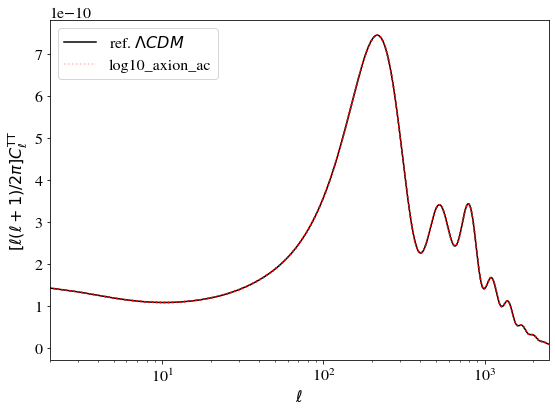

In [21]:
# # Fixed settings with Planck
# #
# common_settings = {"output":'tCl,lCl',
#                    "lensing": 'yes',
#                    "A_s": 2.176e-9,  
#                    "n_s": 0.9649,
#                    "h": 0.7352,
#                    "omega_b": 0.02255,
#                    "omega_cdm": 0.1272,
#                    "tau_reio": 0.068,
#                    #'Omega_Lambda': 0.7,
#                    "Omega_fld": 0,
#                    "Omega_scf": 0.01,
#                    "n_axion": 3,
#                    "scf_tuning_index": 0,
#                    "scf_parameters": '0.1,0',
#                    "scf_potential": "axion",}

# # arrays for output
# #
# #kvec = np.logspace(-4,np.log10(3),1000)
# legarray = []
# twopi = 2.*math.pi
# #
# # Create figures
# #
# fig_TT, ax_TT = plt.subplots()
# #
# # loop over varying parameter values
# #
# for i in range(var_num):
#     #
#     # deal with varying parameters:
#     #
#     var = var_min + (var_max-var_min)*i/(var_num-1.)
#     var2 = var2_min + (var2_max-var2_min)*i/(var2_num-1.)
#     #
#     print (' * Compute with %s=%e'%(var_name,var))
#     print (' * Compute with %s=%e'%(var2_name,var2))
#     #
#     # deal with colors and legends
#     #
#     if i == 0:
#         var_color = 'k'
#         linestyle_a = '-'
#         var_alpha = 1.
#         legarray.append(r'ref. $\Lambda CDM$')
#     else:
#         var_color = 'r'
#         var_alpha = 1.*i/(var_num-1.)
#         linestyle_a = ':'
#     if i == var_num-1:
#         legarray.append(var_legend)
#     #    
#     # call CLASS
#     #
#     M = Class()
#     M.set(common_settings)
#     M.set({var_name: var})
#     M.set({var2_name: math.log10(var2)})
#     M.compute()
#     #
#     # get Cls
#     #
#     clM = M.lensed_cl(2500)
#     ll = clM['ell'][2:]
#     clTT = clM['tt'][2:]
#     #print(clM)
#     #
#     # plot C_l^TT
#     #
#     ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha, linestyle = linestyle_a)
#     #ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var2_color,alpha=var2_alpha,linestyle='-')
#     #
#     # reset CLASS
#     #
#     M.struct_cleanup()
    
# # output of C_l^TT figure
# #      
# ax_TT.set_xlim([2,2500])
# ax_TT.set_xlabel(r'$\ell$')
# ax_TT.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
# ax_TT.legend(legarray)
# fig_TT.tight_layout()
# fig_TT.savefig('spectra_%s_cltt.pdf' % var_figname)